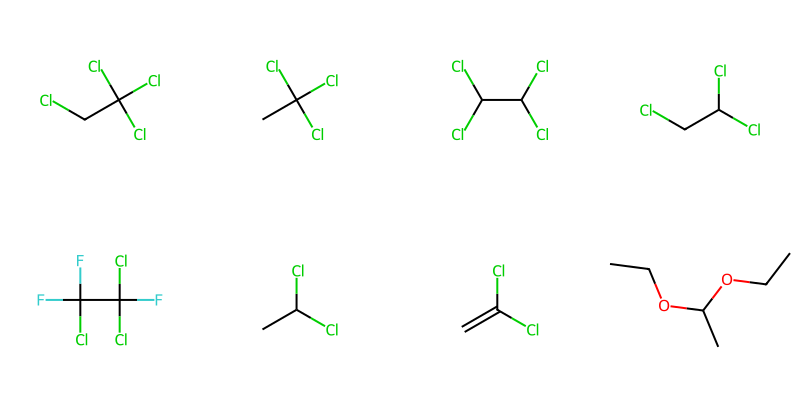

In [2]:
#imports
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
import numpy as np

#Dataset
url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv'
df = pd.read_csv(url)

#SMILES to RDKit Molecule objects
df['Molecule'] = df['SMILES'].apply(Chem.MolFromSmiles)

#First 5 molecules
img = Draw.MolsToGridImage(df['Molecule'][:8], molsPerRow=4, subImgSize=(200, 200))
img

In [3]:
#Coloumns
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # 1. LogP (Octanol-water partition coefficient) (decreases)
        logp = Descriptors.MolLogP(mol)
        # 2. MW (decreases)
        mw = Descriptors.MolWt(mol)
        # 3. RB (Number of Rotatable Bonds)
        rb = Descriptors.NumRotatableBonds(mol)
        # 4. AP (Aromatic Proportion)
        #Number of aromatic atoms / Number of heavy atoms
        aromatic_atoms = [mol.GetAtomWithIdx(i).GetIsAromatic() for i in range(mol.GetNumAtoms())]
        num_aromatic = sum(aromatic_atoms)
        heavy_atoms = mol.GetNumHeavyAtoms()
        ap = num_aromatic / heavy_atoms if heavy_atoms > 0 else 0
        
        return pd.Series([logp, mw, rb, ap])
    return pd.Series([None, None, None, None])

#Columns
df[['LogP', 'MW', 'NumRotatableBonds', 'AP']] = df['SMILES'].apply(calculate_descriptors)

#Numeric data
df[['SMILES', 'LogP', 'MW', 'NumRotatableBonds', 'AP']].head()

,SMILES,LogP,MW,NumRotatableBonds,AP
0,ClCC(Cl)(Cl)Cl,2.5954,167.850,0.0,0.0
1,CC(Cl)(Cl)Cl,2.3765,133.405,0.0,0.0
2,ClC(Cl)C(Cl)Cl,2.5938,167.850,1.0,0.0
3,ClCC(Cl)Cl,2.0289,133.405,1.0,0.0
4,FC(F)(Cl)C(F)(Cl)Cl,2.9189,187.375,1.0,0.0
